

## **Business objective**

It is a dataset that describes Portugal bank marketing campaigns results.
Business objective is to predict whether a banking customer will subscribe to term deposit or not.

Classifying the customers subscribing to term deposit will help the banking marketing team to focus on right customer for running marketing campaigns which saves lot of effort and time.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import OrderedDict
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

#/input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/bank-marketing-campaigns-dataset/bank-additional-full.csv


In [2]:
data=pd.read_csv("../input/bank-marketing-campaigns-dataset/bank-additional-full.csv",sep=";")
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## **Data Cleaning**

In [3]:
data.shape

(41188, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

***Identifying Numerical and Categorical features***.

In [5]:
categorical_cols=data.select_dtypes(include='object')

In [6]:

for col in categorical_cols.columns:
    print("Unique values in column:",col )
    print(categorical_cols[col].unique())
    print(sep = '\n' )
    print("value counts in column",col )
    print(categorical_cols[col].value_counts())
    print("_________________________________")

Unique values in column: job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

value counts in column job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
_________________________________
Unique values in column: marital
['married' 'single' 'divorced' 'unknown']

value counts in column marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
_________________________________
Unique values in column: education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

value counts in column education
university.degree      12168
high.

In [7]:
numeric_cols=data.select_dtypes(include=np.number)
numeric_cols.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


*pdays is the number of days that passed by after the client was last contacted from a previous campaign and 999 means client was not previously contacted*

*So let's replace the value 999 with 0*


In [8]:
numeric_cols['pdays'].unique() ##before replacing 

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [9]:
data.pdays = data.pdays.replace(999, 0)  
numeric_cols=data.select_dtypes(include=np.number)

In [10]:
numeric_cols['pdays'].unique() #after replacing

array([ 0,  6,  4,  3,  5,  1, 10,  7,  8,  9, 11,  2, 12, 13, 14, 15, 16,
       21, 17, 18, 22, 25, 26, 19, 27, 20])

## **Exploratory Data Analysis (EDA)**


**Statistical summary for Numerical features**

In [11]:
def des_stat(new_df):
    
    result=[]
    
    for col in list(new_df.columns):
        
        stat=OrderedDict(
        {'feature_name':col,'count':new_df[col].count(),'minimum':new_df[col].min(),'Q1':new_df[col].quantile(0.25),
        'mean':new_df[col].mean(),'median':new_df[col].median(),'Q3':new_df[col].quantile(0.75),'Maximum':new_df[col].max(),
        'variance':round(new_df[col].var(),2),'sd':round(new_df[col].std(),2),'kurtosis':round(new_df[col].kurt(),2),'skewness':round(new_df[col].skew(),2)})
        result.append(stat)
        
        if new_df[col].skew()<-1:
            
            sk_label='Highly negatively skewed'
            
        elif -1 <=new_df[col].skew()<-0.5:
            
            sk_label='moderately negatively skewed'
            
        elif -0.5 <=new_df[col].skew()<0:
            
            sk_label='fairly negatively skewed(normal distribution)'
            
        elif 0<=new_df[col].skew()<0.5:
            
            sk_label='fairly positive skewed(normal distribution)'
            
        elif 0.5<=new_df[col].skew()<1:
            
            sk_label='moderately positively skewed'
            
        elif new_df[col].skew()>1:
            
            sk_label='highly positively skewed'
            
        else:
            
            sk_label='error'
        stat.update({'skewness_status':sk_label})
        
    result=pd.DataFrame(result)
    return(result)

In [12]:
des_stat(numeric_cols)

,feature_name,count,minimum,Q1,mean,median,Q3,Maximum,variance,sd,kurtosis,skewness,skewness_status
0,age,41188,17.000,32.000,40.024060,38.000,47.000,98.000,108.60,10.42,0.79,0.78,moderately positively skewed
1,duration,41188,0.000,102.000,258.285010,180.000,319.000,4918.000,67225.73,259.28,20.25,3.26,highly positively skewed
2,campaign,41188,1.000,1.000,2.567593,2.000,3.000,56.000,7.67,2.77,36.98,4.76,highly positively skewed
3,pdays,41188,0.000,0.000,0.221229,0.000,0.000,27.000,1.82,1.35,76.40,7.94,highly positively skewed
4,previous,41188,0.000,0.000,0.172963,0.000,0.000,7.000,0.24,0.49,20.11,3.83,highly positively skewed
5,emp.var.rate,41188,-3.400,-1.800,0.081886,1.100,1.400,1.400,2.47,1.57,-1.06,-0.72,moderately negatively skewed
6,cons.price.idx,41188,92.201,93.075,93.575664,93.749,93.994,94.767,0.34,0.58,-0.83,-0.23,fairly negatively skewed(normal distribution)
7,cons.conf.idx,41188,-50.800,-42.700,-40.502600,-41.800,-36.400,-26.900,21.42,4.63,-0.36,0.30,fairly positive skewed(normal distribution)
8,euribor3m,41188,0.634,1.344,3.621291,4.857,4.961,5.045,3.01,1.73,-1.41,-0.71,moderately negatively skewed
9,nr.employed,41188,4963.600,5099.100,5167.035911,5191.000,5228.100,5228.100,5220.28,72.25,-0.00,-1.04,Highly negatively skewed


* Analysis made for numerical features,

1. count value is 41188 for all the numerical features, hence there are no null values
2. For the features pdays and previous, quartiles Q1,Q2,Q3=0, which means about 75% of data has customers who are not contacted before this campaign

3. Most of the numerical features are skewed and those outliers has to be treated.


**Outlier Treatment**

In [13]:
#function that returns a dataframe after treating the ouliers

def replace_outlier(df,col,method='quartile',strategy='mean'): ##as median is the best rep we gave median as strategy
    
    col_data=df[col]
    
    if method=='quartile':
        
        q1=df[col].quantile(0.25)
        q2=df[col].quantile(0.5)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        lower_limit=q1-1.5*iqr          
        upper_limit=q3+1.5*iqr
        col_mean=df[col].mean()
    elif method=='std_dev':
        
        col_mean=df[col].mean()
        col_std_dev=df[col].std()
        lwr_limit=col_mean-2*col_std_dev
        upr_limit=col_mean+2*col_std_dev
    
    
    outliers=df.loc[(col_data < lower_limit)|(col_data > upper_limit),col]
    outliers_density=len(outliers)/len(df)
    
    if strategy=='median':
        
        df.loc[(col_data < lower_limit)|(col_data > upper_limit),col]=q2
        
    elif strategy=='mean':
        
        df.loc[(col_data < lower_limit)|(col_data > upper_limit),col]=col_mean
    
    return df

*Plotting ODT (Outlier Detection Plots)*

In ODT plot is done for all the numerical features and we have three types of plots. 


1-Boxplot

2-Histogram with outliers 

3-Histogram without outliers

In [14]:
def odt_plots(df,col):
    f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,20))
    
    #box plot for descriptive stats
    
    sns.boxplot(df[col],ax=ax1,color='red')
    ax1.set_title(col+ '  '+'Boxplot')
    ax1.set_xlabel('Boxplot')
    ax1.set_ylabel('Values')
    
    
    
    #plotting histogram with outliers
    
    sns.distplot(df[col],ax=ax2,color='blue')
    ax2.set_title(col+ '  '+'Histogram with outliers')
    ax2.set_xlabel('Histogram')
    ax2.set_ylabel('Values')
    
    #plotting histogram after treating outliers
    
    y = replace_outlier(df,col)
    
    sns.distplot(y[col],ax=ax3,color='green')
    ax3.set_title(col+ '  '+'Histogram without outliers')
    ax3.set_xlabel('Histogram')
    ax3.set_ylabel('Values')
    

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

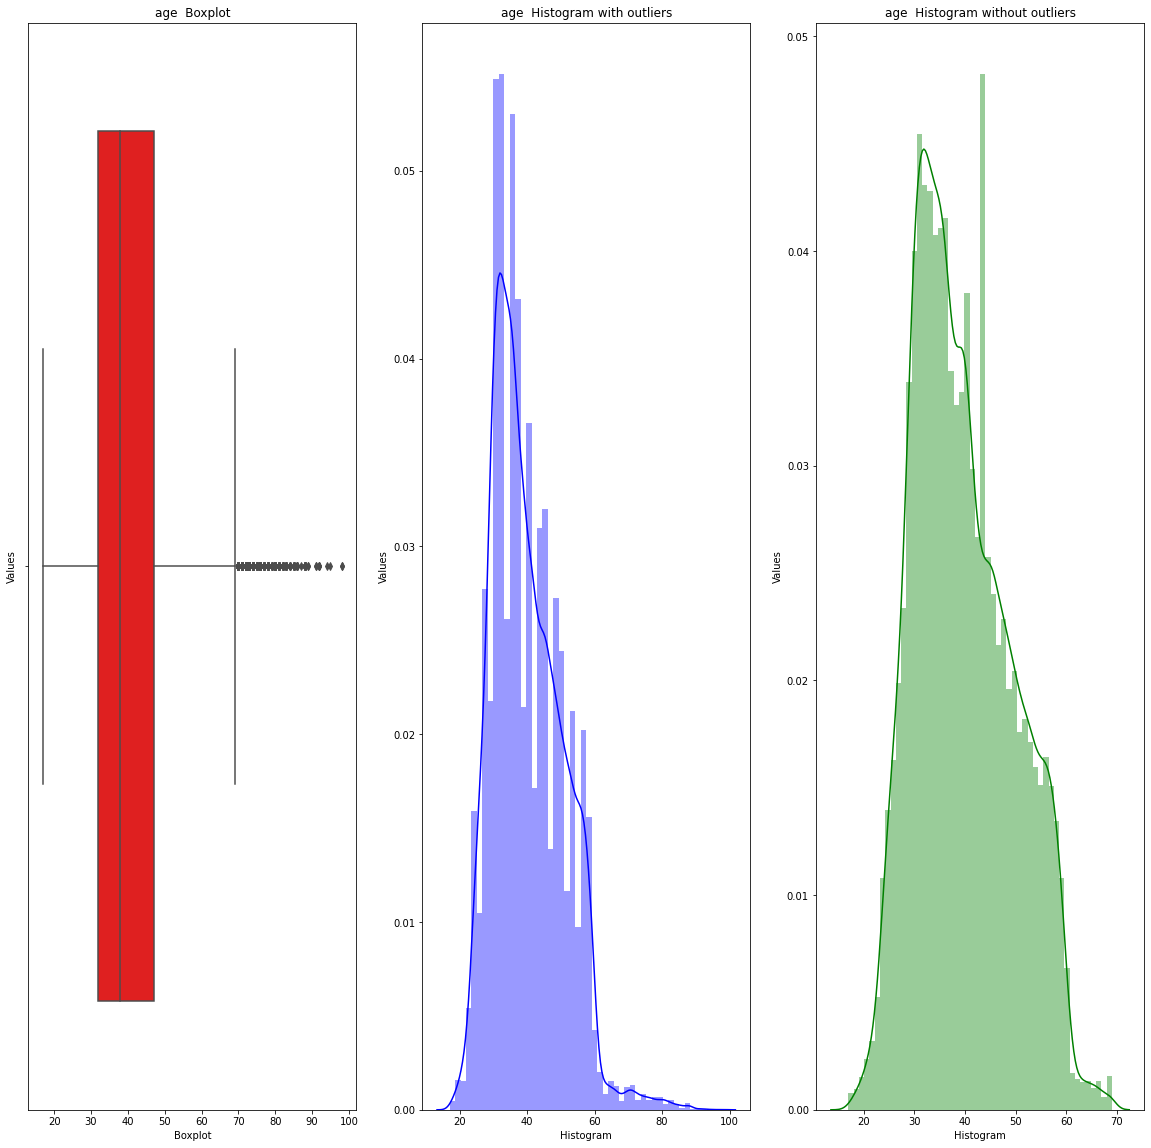

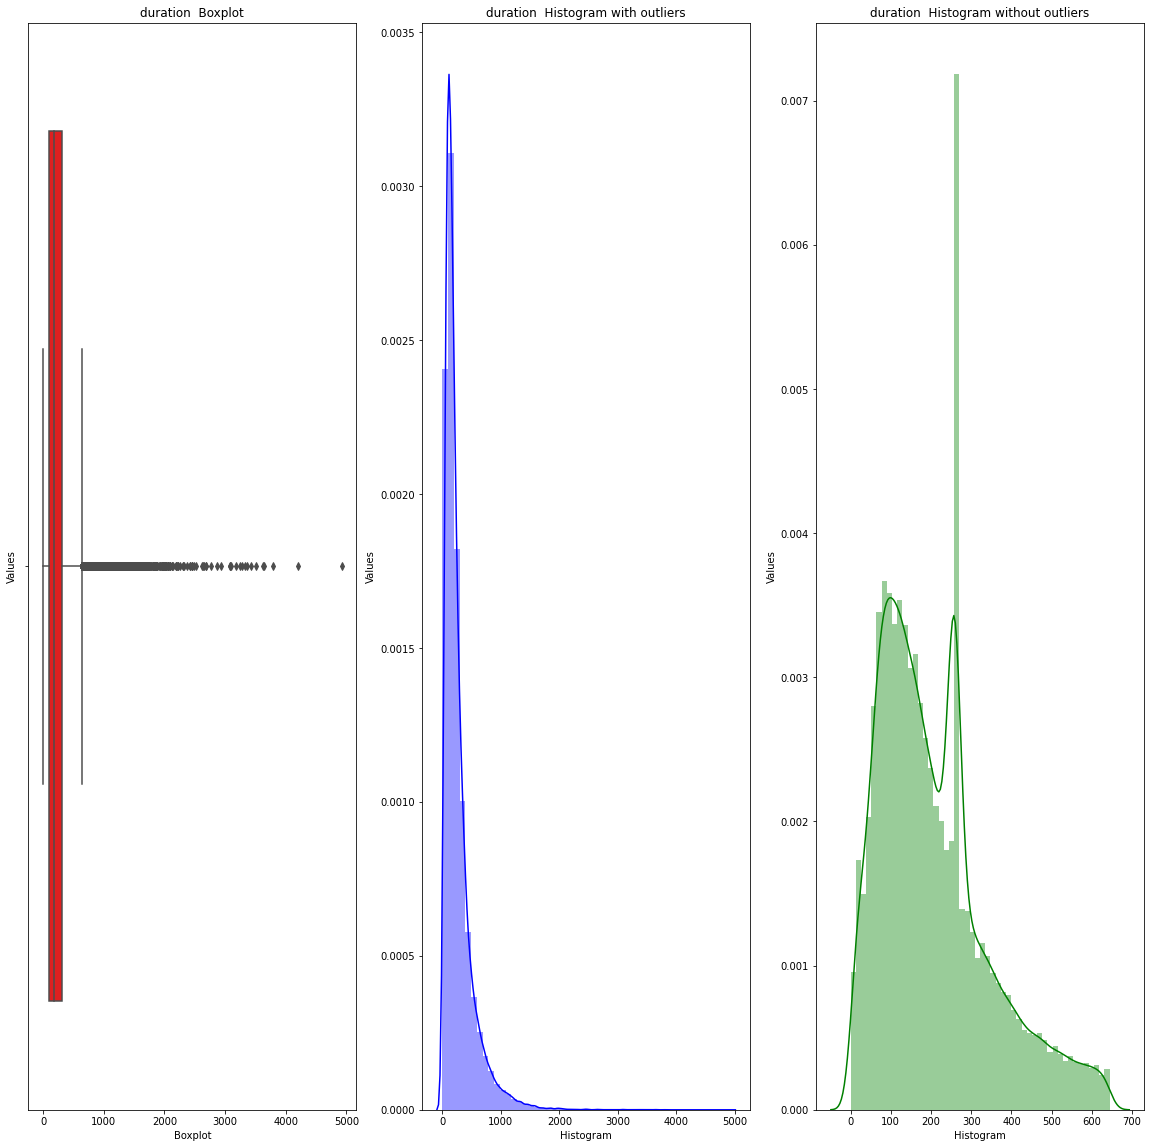

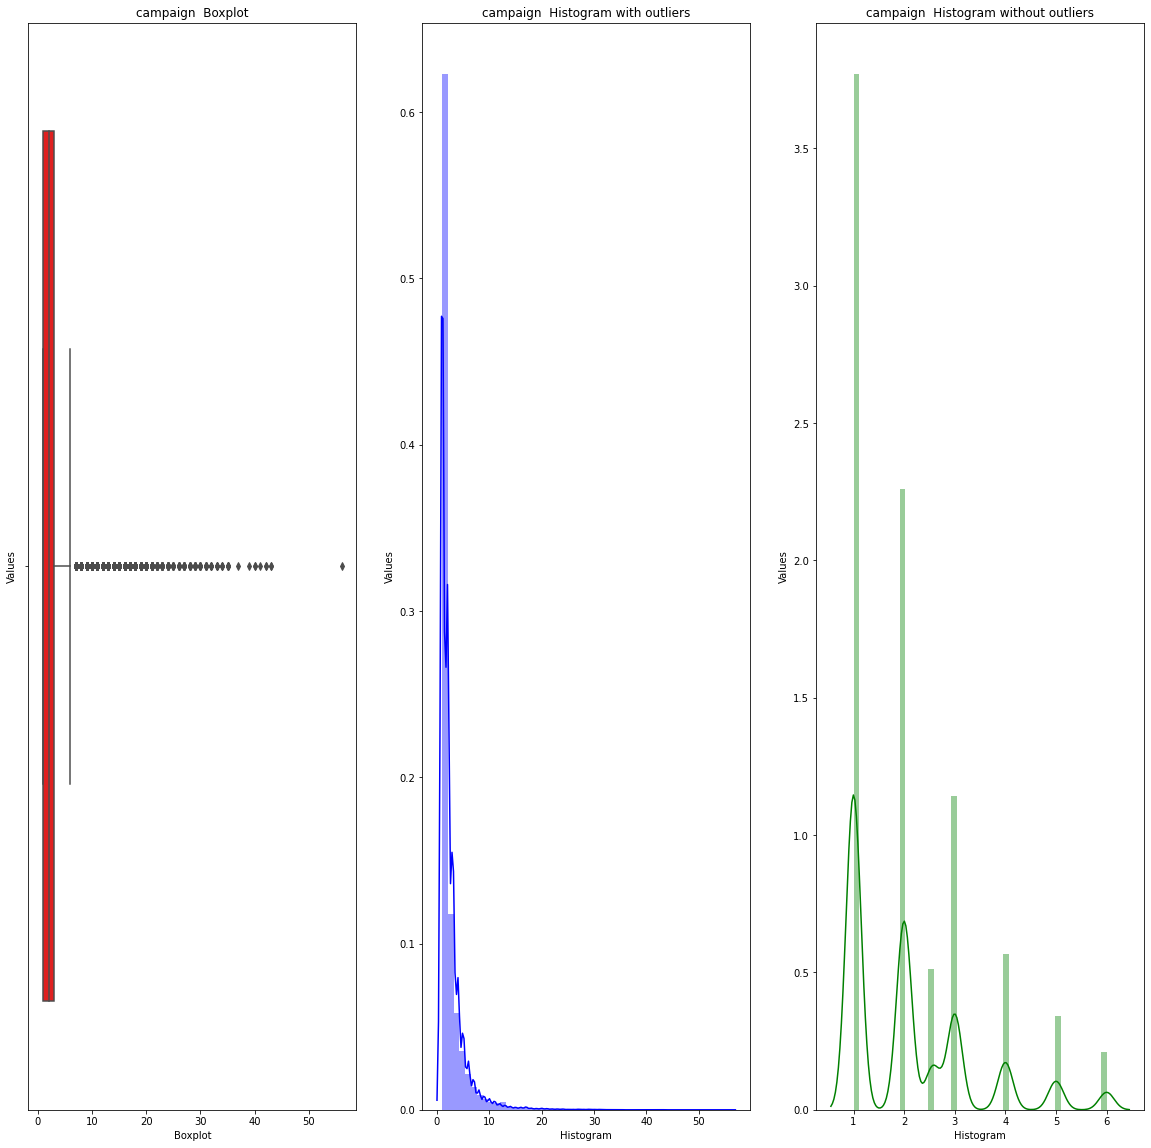

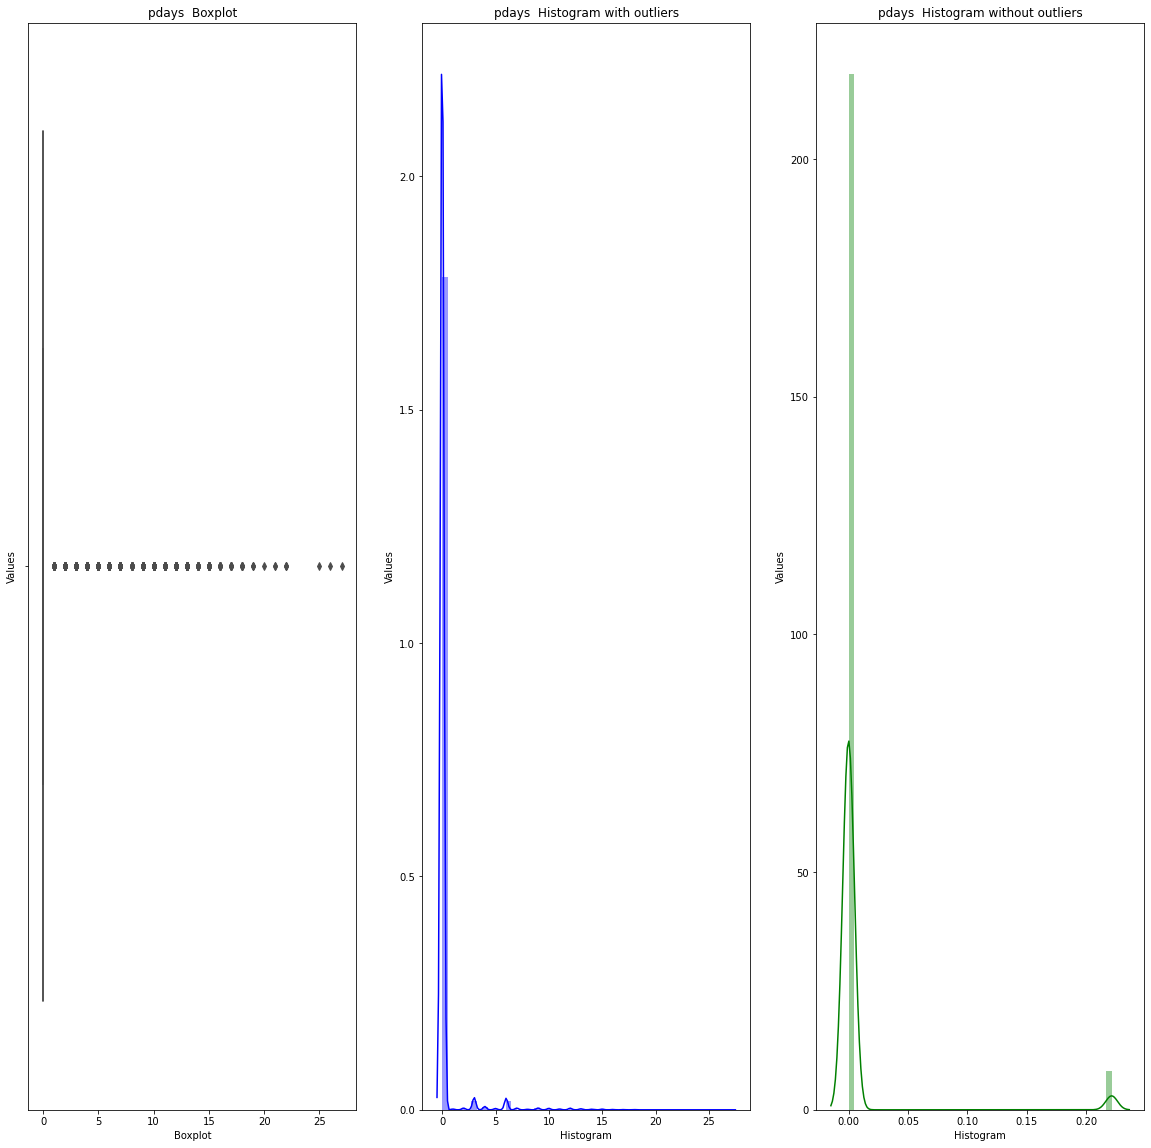

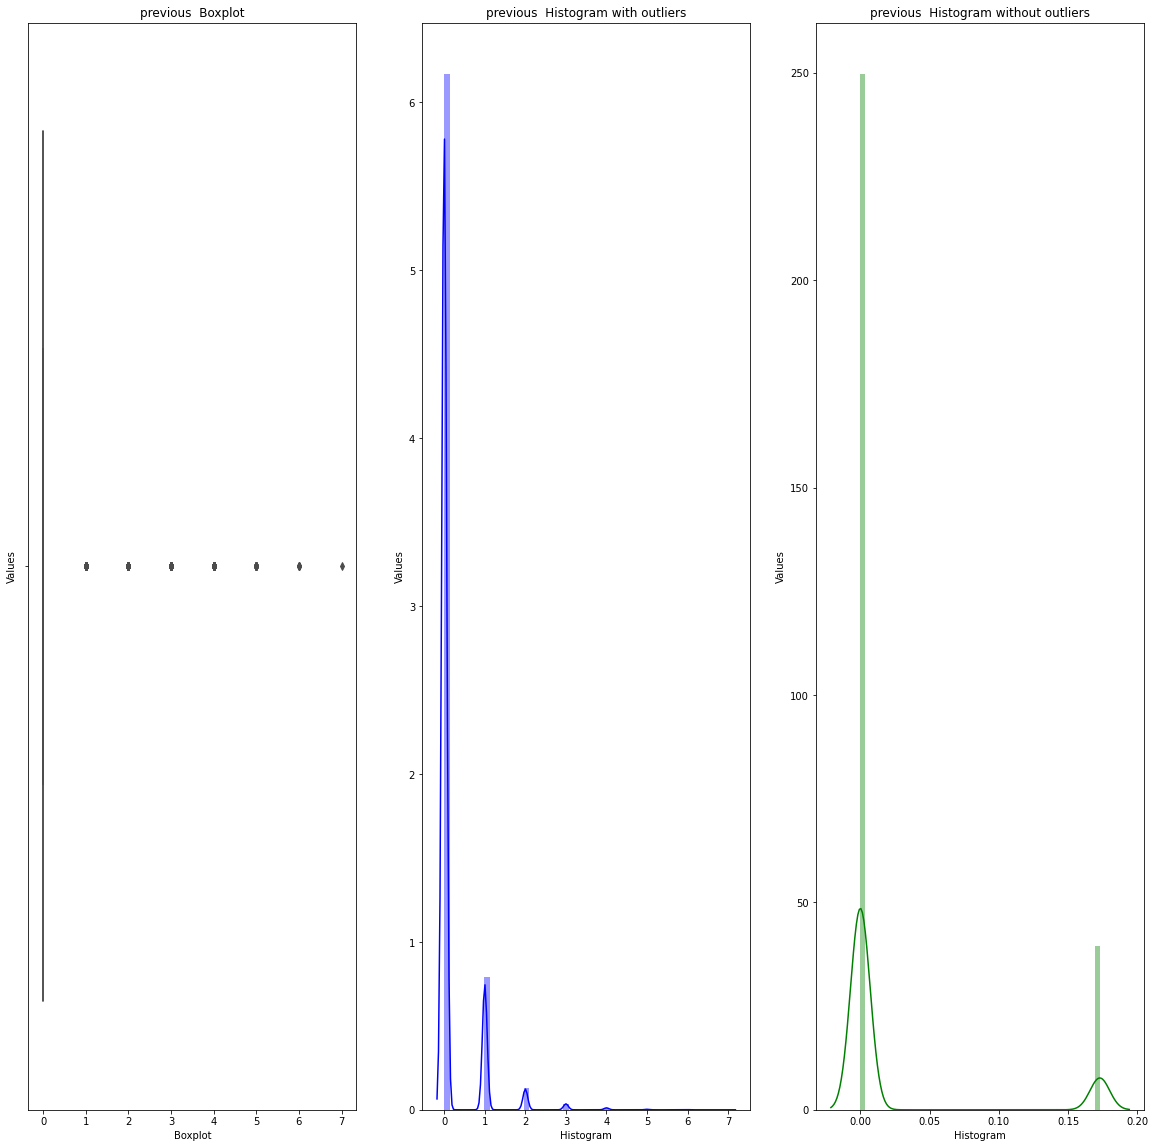

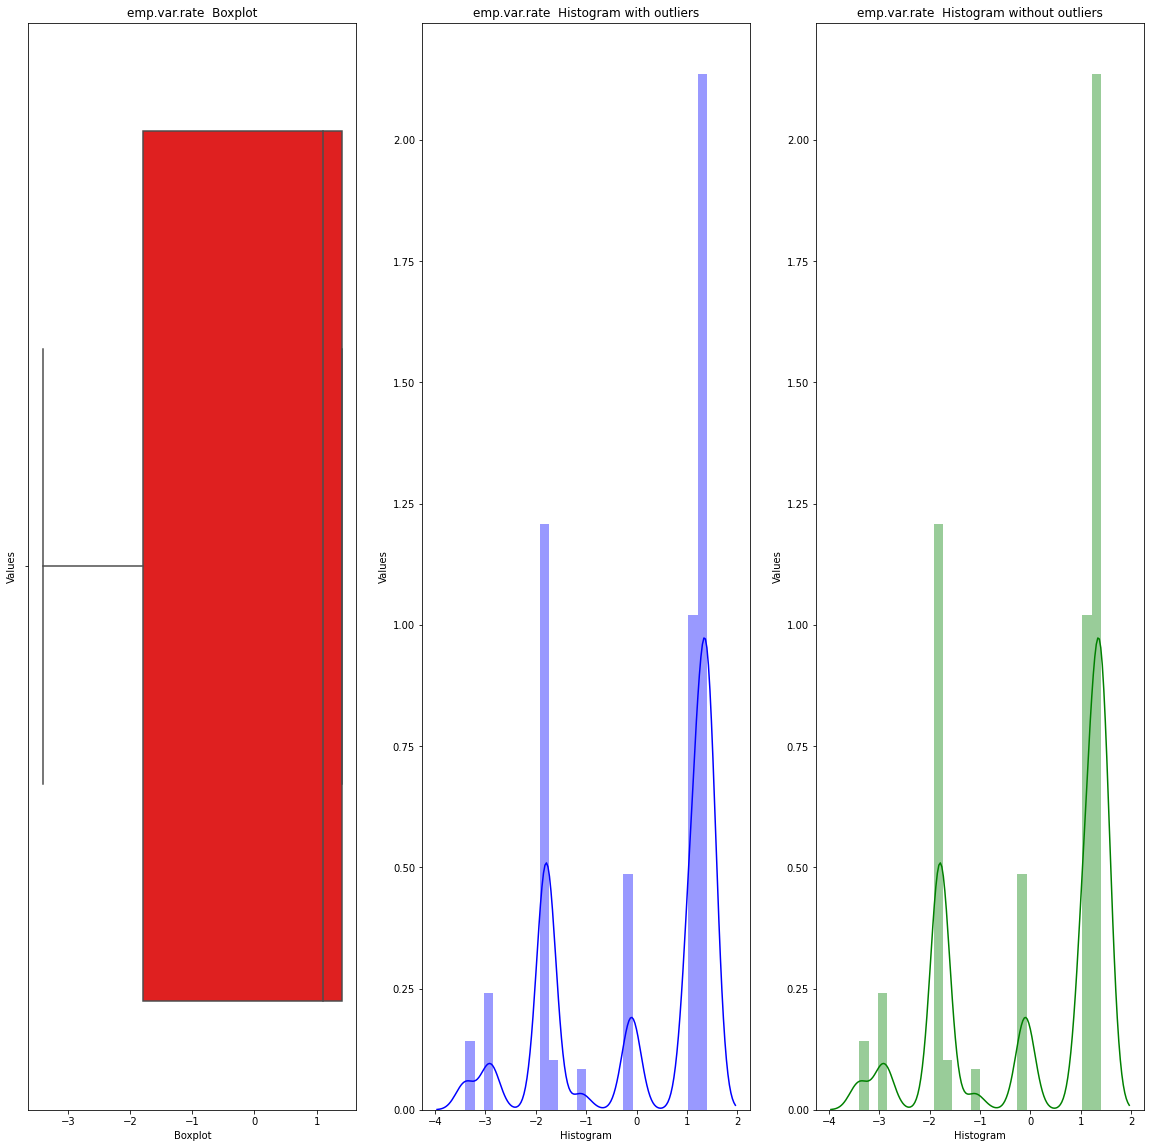

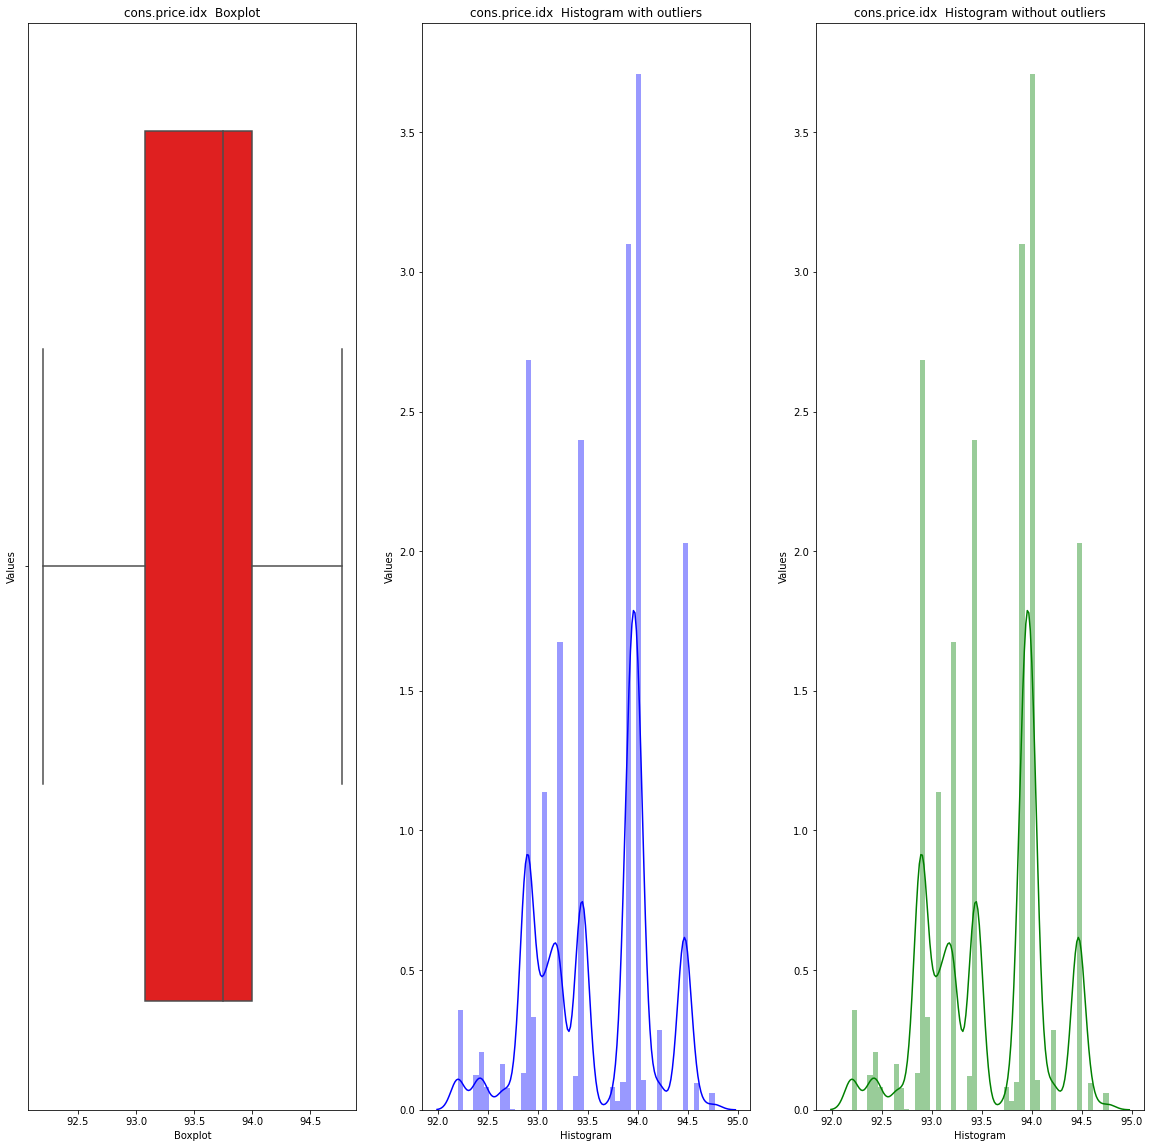

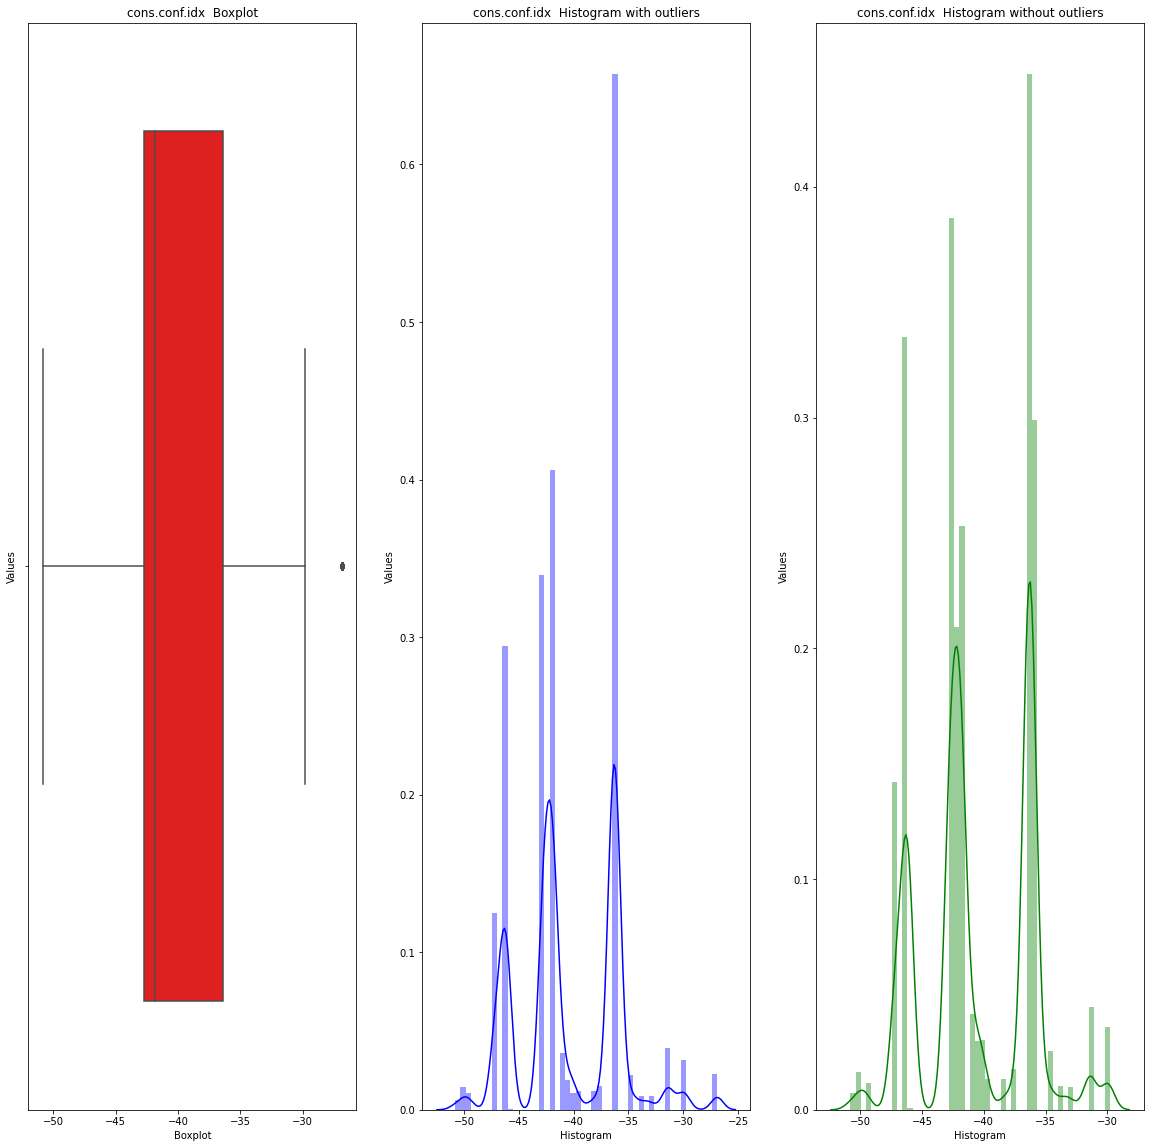

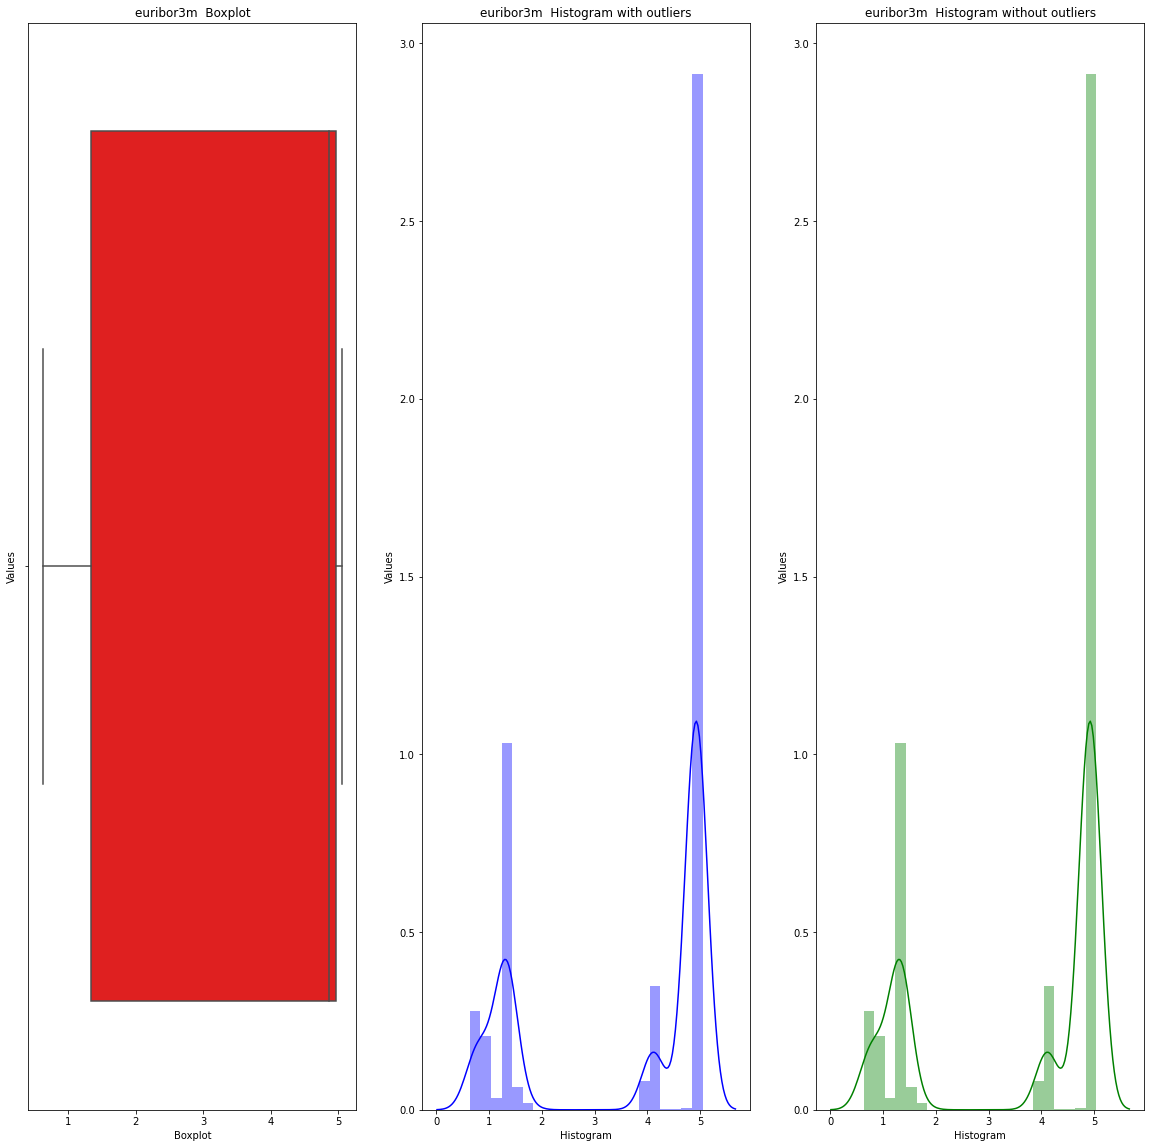

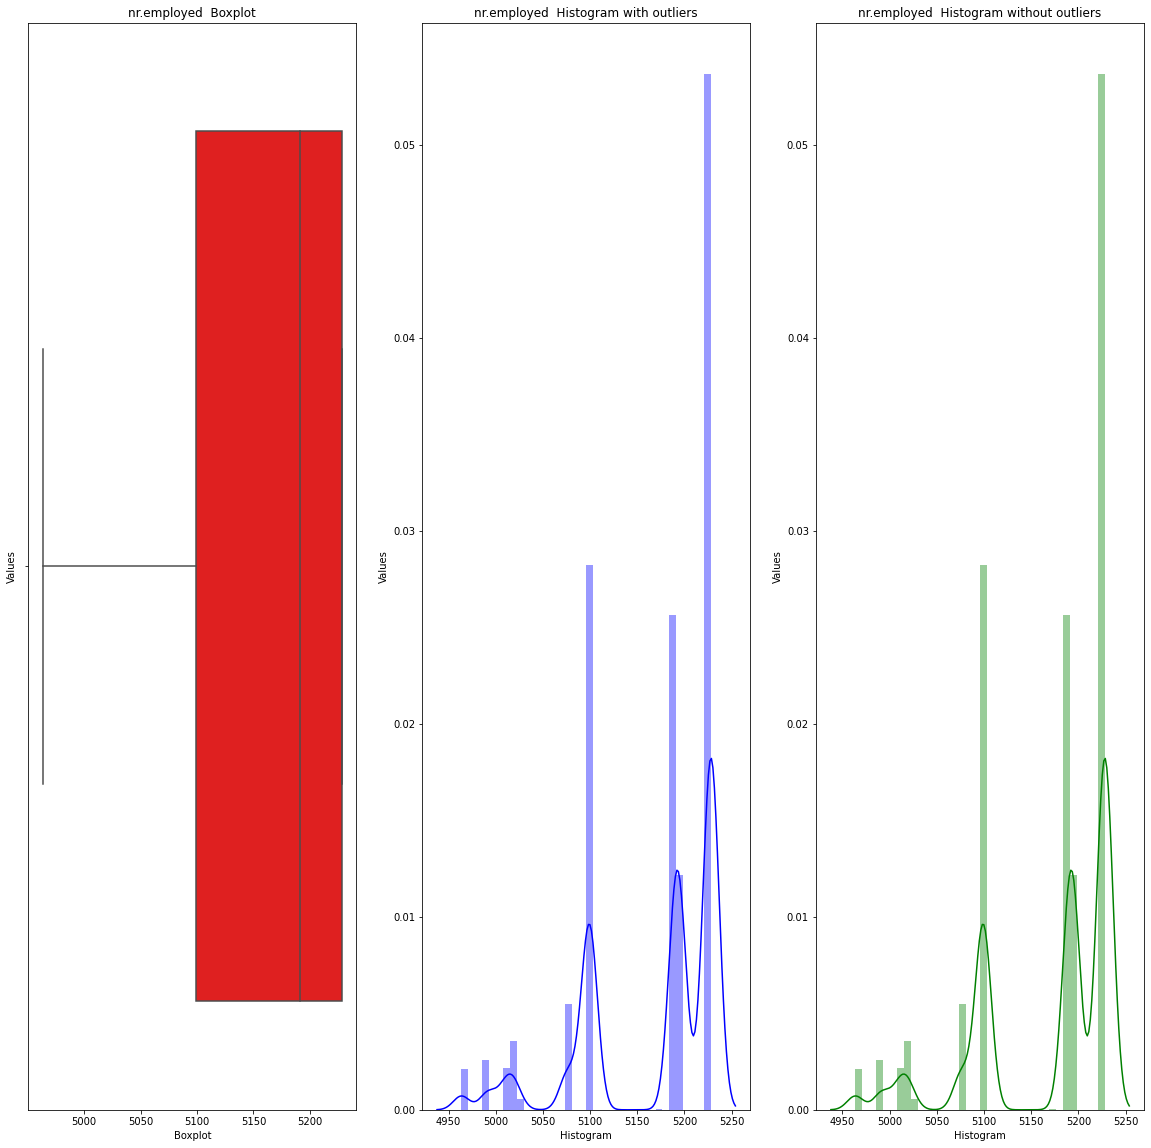

In [15]:
for col in numeric_cols.columns:
    odt_plots(numeric_cols,col)

**Understanding the relationship between each numerical independent variable with the dependant variable**

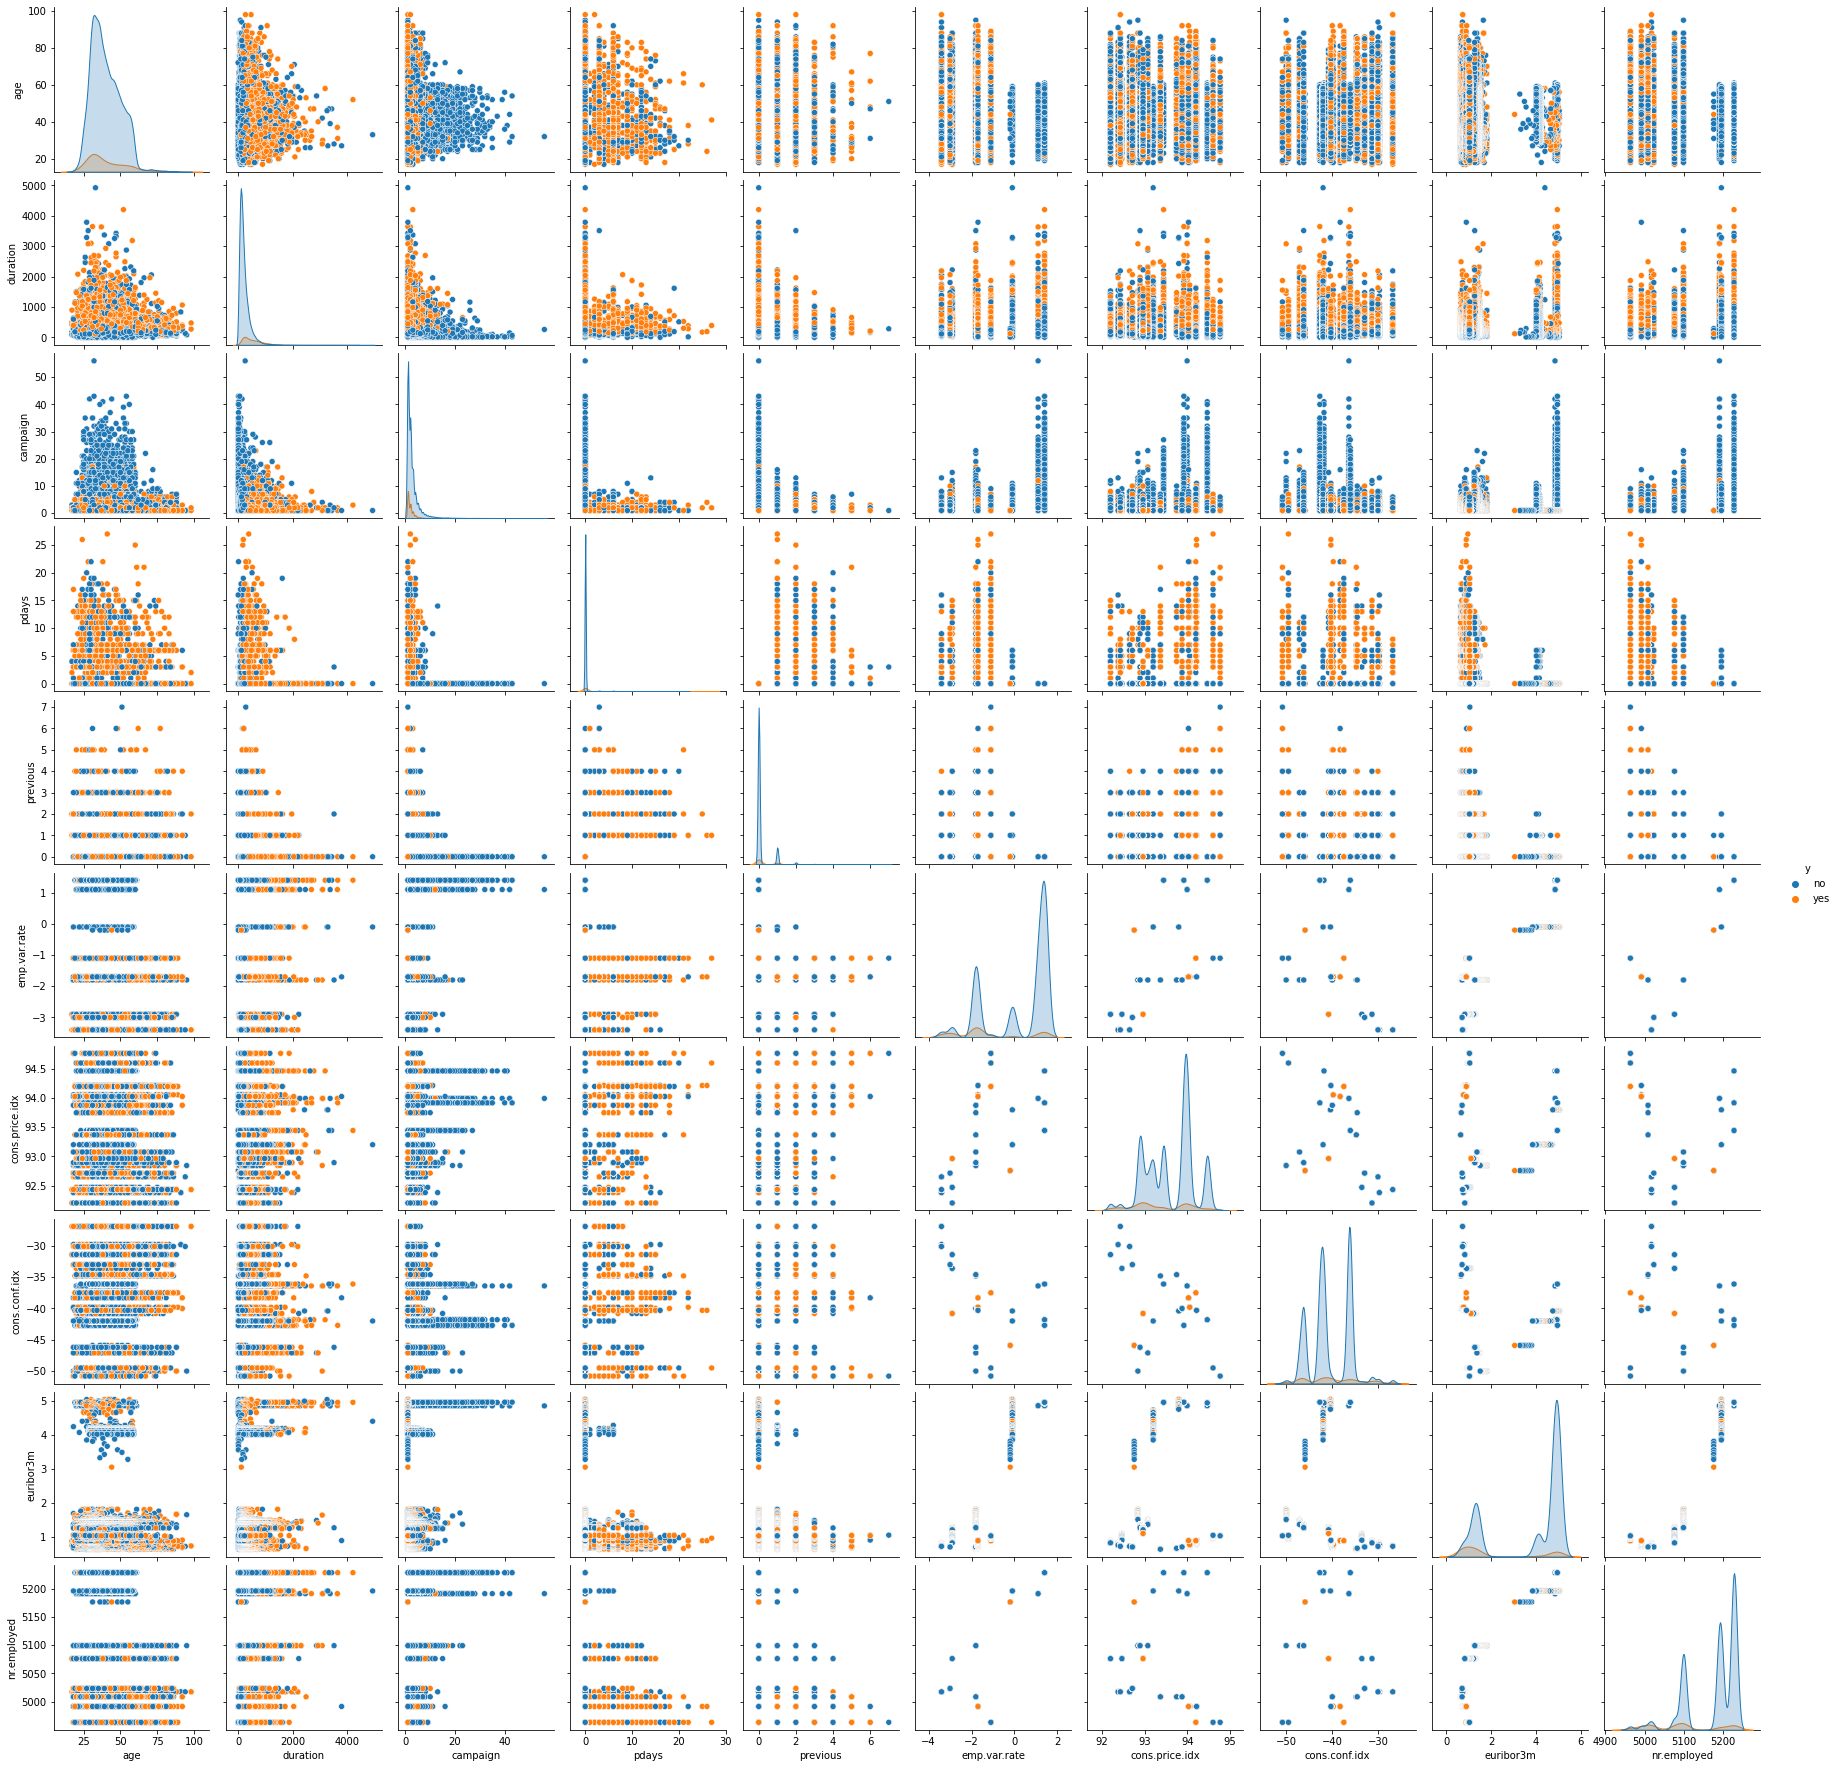

In [16]:
add_column=data[['y']]
test_df=data.select_dtypes(include=np.number)
test_df=test_df.join(add_column)
sns.pairplot(test_df,hue='y')

**Relationship study between duration and target feature**

Text(0.5, 1.0, 'Quartile 1 distribution for the feature duration')

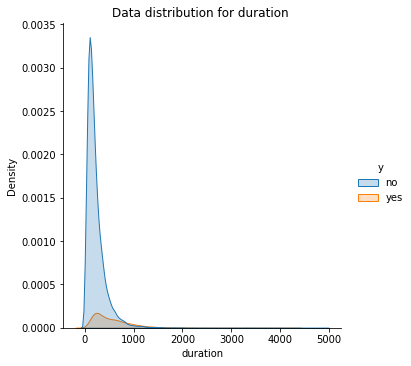

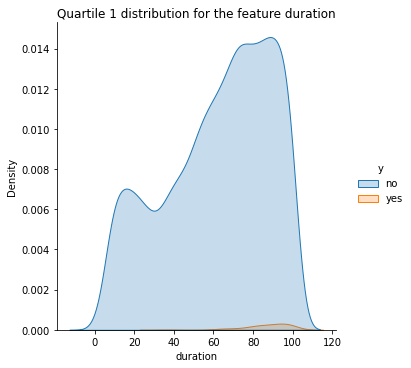

In [17]:
sns.displot(test_df, x="duration", hue="y", kind="kde", fill=True)
plt.title("Data distribution for duration ")
lower_limit=test_df['duration'].quantile(0.25)
q1=test_df.loc[(test_df['duration'] < lower_limit)]
sns.displot(q1, x="duration", hue="y", kind="kde", fill=True)
plt.title("Quartile 1 distribution for the feature duration")

* Analysis:

Out of 41188 customers, 25% of (approximately 12000) customers have attended campaign phone calls having call duration from 0 to 120 secs.

If the customer’s call duration is less than a minute, it is very obvious that there is no chance a customer will agree to place deposit.


**Relationship study between campaign and target feature**

<AxesSubplot:xlabel='campaign', ylabel='duration'>

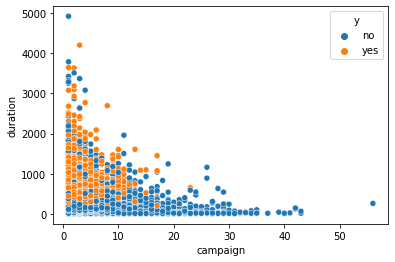

In [18]:
sns.scatterplot(x='campaign',y='duration',data=test_df,hue='y')

* Analysis:

Data shows customer subscribing to term deposit chances are very less when the number of contacts performed is more than 25.

Hence the bank no  need to focus on customers who are already contacted at least 25 times.


**Relationship study**

*checking for multicollinearity*

<AxesSubplot:>

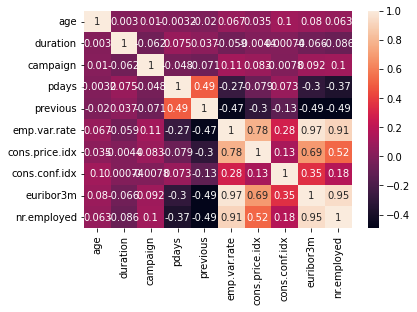

In [19]:
df_corr=numeric_cols.corr()
sns.heatmap(df_corr,annot=True)

In [20]:
#features emp.var.rate' and'cons.price.idx causing multicollinerity with 3 other features .
#We can reduce the model complexity by removing the features.

In [21]:
def vif_factor(independant_variable):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif=pd.DataFrame()
    vif['feature']=independant_variable.columns
    vif['vif_factor']=[variance_inflation_factor(independant_variable.values,i) for i in range(independant_variable.shape[1])]
    return vif.sort_values('vif_factor')

In [22]:
vif_factor(numeric_cols) #vif factor before removing the features causing multicollinearity

,feature,vif_factor
3,pdays,1.505719
4,previous,1.840332
1,duration,3.350657
2,campaign,3.848883
0,age,18.201590
5,emp.var.rate,26.749633
7,cons.conf.idx,129.452449
8,euribor3m,210.859600
6,cons.price.idx,21898.056542
9,nr.employed,25598.896785


In [23]:
numeric_cols=numeric_cols.drop(['emp.var.rate'],axis=1)

In [24]:
numeric_cols=numeric_cols.drop(['cons.price.idx'],axis=1)

In [25]:
vif_factor(numeric_cols) #vif factor after removing the features causing multicollinearity

,feature,vif_factor
3,pdays,1.424138
4,previous,1.838528
1,duration,3.336412
2,campaign,3.817304
6,euribor3m,9.425285
0,age,18.187624
5,cons.conf.idx,107.810357
7,nr.employed,171.622337


***Multivariate analysis***

Understanding the relationship between each categorical independant variables with the dependant variable

In [26]:
def eda(data,target):
    ind_var=data.drop(target,axis=1)
    for col in ind_var.columns:
        #sns.countplot(x=col,hue=target,data = data)
            pd.crosstab(ind_var[col],data[target]).plot(kind="bar",stacked=False)

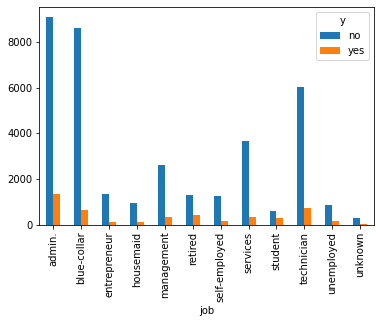

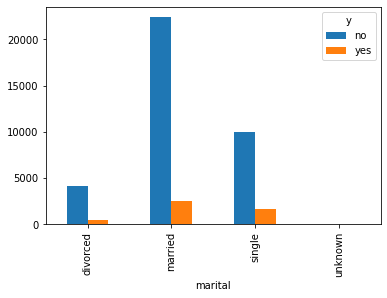

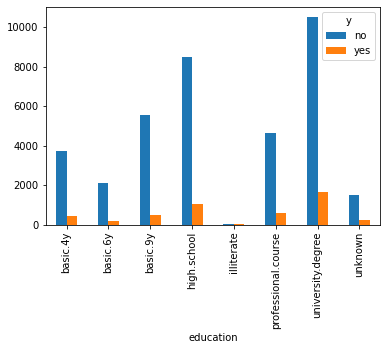

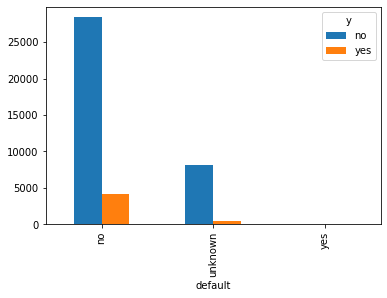

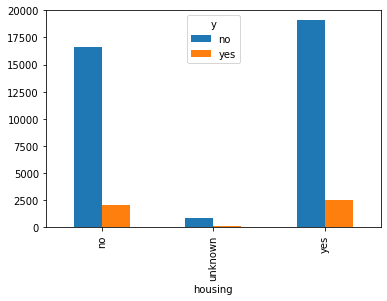

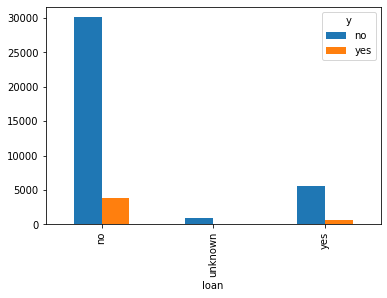

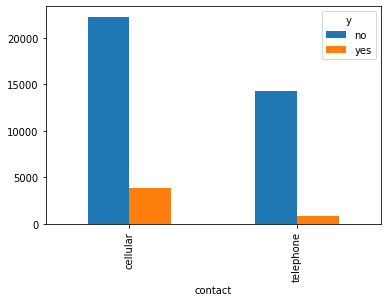

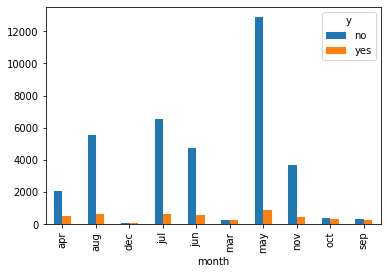

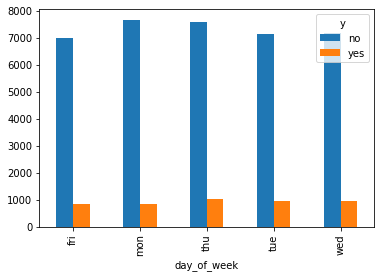

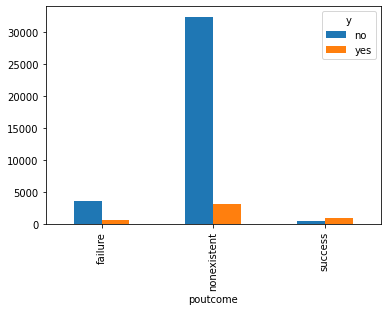

In [27]:
eda(categorical_cols,'y')

* Analysis:


1. Data shows customer working in admin jobs, blue collar jobs and technicians are more likely to opt for term deposit.

2. customers having high school graduation, university graduation are likely to opt for term deposit.

3. Data shows campaign is conducted majorly for customers with no personal loans and no credit cards.

4. campaign is conducted effectively in month of May and for customers having poutcome as non-existent.



## **Feature Engineering**

Age group of customers ranges from 17 to 56, while the range of duration and nr.employed going from 0 to 5k.

It is important to bring down all the features to a common scale without distorting the differences in the range of the values.

Using MinMaxScaler for standardization.


In [28]:
scalar=MinMaxScaler()
column=numeric_cols.columns
numeric_cols=scalar.fit_transform(numeric_cols)
df_numeric=pd.DataFrame(numeric_cols,columns=column)
df_numeric.head()

,age,duration,campaign,pdays,previous,cons.conf.idx,euribor3m,nr.employed
0,0.750000,0.405280,0.0,0.0,0.0,0.685714,0.957379,0.859735
1,0.769231,0.231366,0.0,0.0,0.0,0.685714,0.957379,0.859735
2,0.384615,0.350932,0.0,0.0,0.0,0.685714,0.957379,0.859735
3,0.442308,0.234472,0.0,0.0,0.0,0.685714,0.957379,0.859735
4,0.750000,0.476708,0.0,0.0,0.0,0.685714,0.957379,0.859735


Transforming non-numerical labels to numerical labels using Label encoder

In [29]:
le=LabelEncoder()
df_categorical=pd.DataFrame()
for col in categorical_cols.columns:
    df_categorical[col]=le.fit_transform(categorical_cols[col])

In [30]:
df_categorical.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,3,1,0,0,0,0,1,6,1,1,0
1,7,1,3,1,0,0,1,6,1,1,0
2,7,1,3,0,2,0,1,6,1,1,0
3,0,1,1,0,0,0,1,6,1,1,0
4,7,1,3,0,0,2,1,6,1,1,0


In [31]:
df=pd.concat([df_numeric,df_categorical],axis=1)
df.head()

,age,duration,campaign,pdays,previous,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,0.750000,0.405280,0.0,0.0,0.0,0.685714,0.957379,0.859735,3,1,0,0,0,0,1,6,1,1,0
1,0.769231,0.231366,0.0,0.0,0.0,0.685714,0.957379,0.859735,7,1,3,1,0,0,1,6,1,1,0
2,0.384615,0.350932,0.0,0.0,0.0,0.685714,0.957379,0.859735,7,1,3,0,2,0,1,6,1,1,0
3,0.442308,0.234472,0.0,0.0,0.0,0.685714,0.957379,0.859735,0,1,1,0,0,0,1,6,1,1,0
4,0.750000,0.476708,0.0,0.0,0.0,0.685714,0.957379,0.859735,7,1,3,0,0,2,1,6,1,1,0


## **Model Building**

In [32]:
lr=LogisticRegression(solver='lbfgs', max_iter=3000)
x=df.drop('y',axis=1)
y=df['y']

In [33]:
x.head()

,age,duration,campaign,pdays,previous,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,0.750000,0.405280,0.0,0.0,0.0,0.685714,0.957379,0.859735,3,1,0,0,0,0,1,6,1,1
1,0.769231,0.231366,0.0,0.0,0.0,0.685714,0.957379,0.859735,7,1,3,1,0,0,1,6,1,1
2,0.384615,0.350932,0.0,0.0,0.0,0.685714,0.957379,0.859735,7,1,3,0,2,0,1,6,1,1
3,0.442308,0.234472,0.0,0.0,0.0,0.685714,0.957379,0.859735,0,1,1,0,0,0,1,6,1,1
4,0.750000,0.476708,0.0,0.0,0.0,0.685714,0.957379,0.859735,7,1,3,0,0,2,1,6,1,1


In [34]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=43)

In [36]:
model=lr.fit(x_train,y_train)
predict_test=model.predict(x_test)

## **Model Evaluation**

Test set results:
___________________________________________________________________
Confusion matrix : 



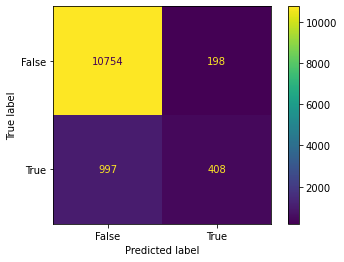


Outcome values testing data: 


True positive: 408
False positives: 198
True negative: 10754
False negative: 997

Classification report testing data: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     10952
           1       0.67      0.29      0.41      1405

    accuracy                           0.90     12357
   macro avg       0.79      0.64      0.68     12357
weighted avg       0.89      0.90      0.89     12357

______________________________________________________________________


In [37]:
# confusion matrix
matrix = confusion_matrix(y_test,predict_test)
print('Test set results:')
print("___________________________________________________________________")
print('Confusion matrix : \n')
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
print( sep='\n')
# outcome values order in sklearn


tp, fn, fp, tn = confusion_matrix(y_test,predict_test,labels=[1,0]).reshape(-1)

print('Outcome values testing data: \n\n')
print('True positive:',tp)
print('False positives:',fp)
print('True negative:',tn)
print('False negative:',fn)
print( sep='\n')
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,predict_test)
print('Classification report testing data: \n',matrix)
print("______________________________________________________________________")

Accuracy of the model (Logistic regression) is 90%, however the results of f1 score is not good. 

f1 score for the class 0(clients not subscribed to term deposit) is 95% but the f1 score for class 1(clients subscribed to term deposit) is only 41%.

This means model tends to work well for class 0 customers but the model is not trained well for class 1 customers.

Let's try with other classification algorithms to increase the f1 score for class 1.


**Random forest classifier**

In [38]:
rf=RandomForestClassifier(n_estimators=100)
model=rf.fit(x_train,y_train)
rf_test=model.predict(x_test)


Test Set results: 


Confusion matrix testing data : 



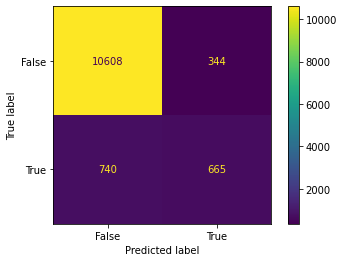

Outcome values testing data : 

True positive: 665
False positives: 344
True negative: 10608
False negative: 740

Classification report testing data: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10952
           1       0.66      0.47      0.55      1405

    accuracy                           0.91     12357
   macro avg       0.80      0.72      0.75     12357
weighted avg       0.90      0.91      0.91     12357



In [39]:
rf_matrix = confusion_matrix(y_test,rf_test)
print('Test Set results: \n\n')
print('Confusion matrix testing data : \n')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = rf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,rf_test,labels=[1,0]).reshape(-1)

print('Outcome values testing data : \n')
print('True positive:',tp)
print('False positives:',fp)
print('True negative:',tn)
print('False negative:',fn)
print( sep='\n')

# classification report for precision, recall f1-score and accuracy
rf_matrix = classification_report(y_test,rf_test)
print('Classification report testing data: \n',rf_matrix)

Accuracy for the random forest classifier model is 91% and the F1 score for class 1 (clients subscribed to term deposit) is 55% which is good compared to the previous model.

## **Conclusion**

**Implemented Logistic regression model and Random forest classifier for the Bank marketing campaign dataset.**

**Classification accuracy for the Random forest classifier worked well and the percentage of accurate prediction is obtained as 91%.**

**The predicted output will give a fair idea whether a customer will subscribe to term deposit or not.**